In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [2]:
co2 = pd.read_csv('co2.csv')
df = co2.copy()

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.shape

(7385, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
df.describe(include="object").T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [8]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [9]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [10]:
# pip install inflection

In [11]:
import inflection

In [12]:
df.columns = [inflection.camelize(column, False) for column in df.columns]
df.columns

Index(['make', 'model', 'vehicleClass', 'engineSize', 'cylinders',
       'transmission', 'fuelType', 'fuelConsCity', 'fuelConsHwy',
       'fuelConsComb', 'fuelConsCombMpg', 'co2'],
      dtype='object')

In [13]:
df.columns = [inflection.underscore(column) for column in df.columns]
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [14]:
df.columns = [inflection.dasherize(inflection.underscore(column)).lower() for column in df.columns]
df.columns

Index(['make', 'model', 'vehicle-class', 'engine-size', 'cylinders',
       'transmission', 'fuel-type', 'fuel-cons-city', 'fuel-cons-hwy',
       'fuel-cons-comb', 'fuel-cons-comb-mpg', 'co2'],
      dtype='object')

In [15]:
df.columns = [inflection.humanize(inflection.underscore(column)) for column in df.columns]
df.columns

Index(['Make', 'Model', 'Vehicle class', 'Engine size', 'Cylinders',
       'Transmission', 'Fuel type', 'Fuel cons city', 'Fuel cons hwy',
       'Fuel cons comb', 'Fuel cons comb mpg', 'Co2'],
      dtype='object')

In [16]:
df.columns = [inflection.titleize(column).replace(' ', '') for column in df.columns]
df.columns

Index(['Make', 'Model', 'VehicleClass', 'EngineSize', 'Cylinders',
       'Transmission', 'FuelType', 'FuelConsCity', 'FuelConsHwy',
       'FuelConsComb', 'FuelConsCombMpg', 'Co2'],
      dtype='object')

In [17]:
# pip install skimpy

In [18]:
from skimpy import clean_columns

In [19]:
df1 = clean_columns(df)
df1.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co_2'],
      dtype='object')

In [20]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'VehicleClass': 'vehicle_class',
                    'EngineSize': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'FuelType': 'fuel_type',
                    'FuelConsCity': 'fuel_cons_city',
                    'FuelConsHwy': 'fuel_cons_hwy',
                    'FuelConsComb': 'fuel_cons_comb',
                    'FuelConsCombMpg': 'fuel_cons_comb_mpg',
                    'Co2': 'co2'
                    }, inplace=True)

In [21]:
for i in df.columns:
    print(i)

make
model
vehicle_class
engine_size
cylinders
transmission
fuel_type
fuel_cons_city
fuel_cons_hwy
fuel_cons_comb
fuel_cons_comb_mpg
co2


In [22]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
make,0,0.0
model,0,0.0
vehicle_class,0,0.0
engine_size,0,0.0
cylinders,0,0.0
transmission,0,0.0
fuel_type,0,0.0
fuel_cons_city,0,0.0
fuel_cons_hwy,0,0.0
fuel_cons_comb,0,0.0


In [23]:
df.make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

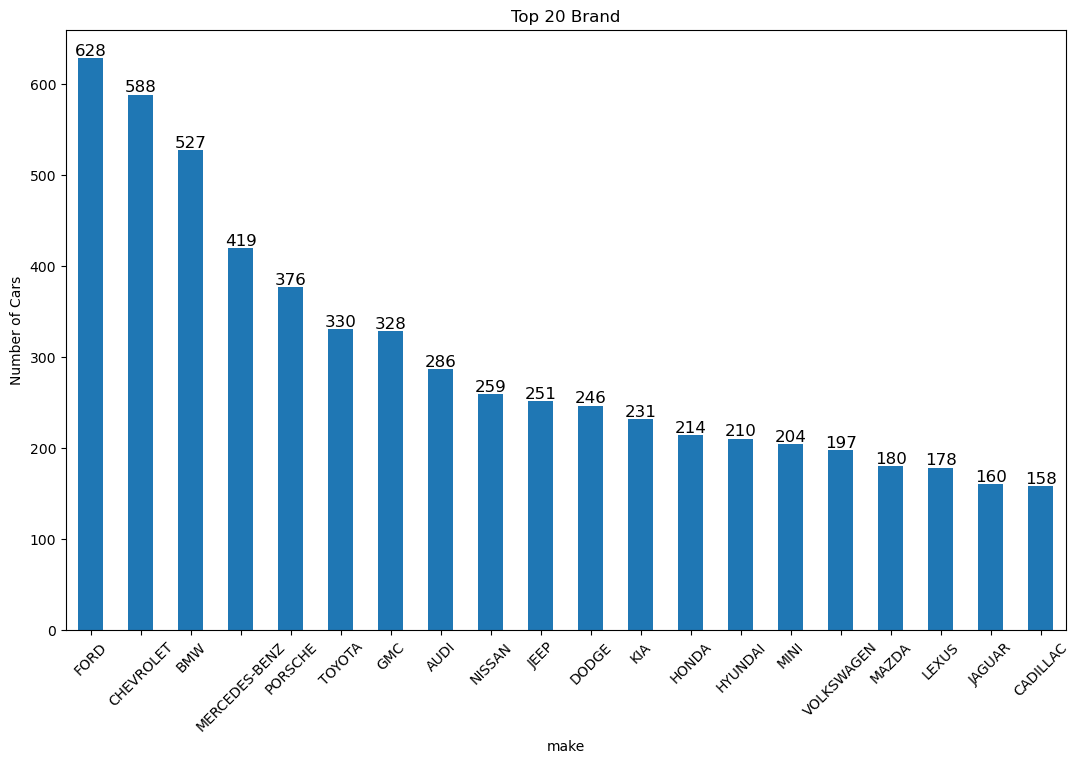

In [24]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);
plt.show()

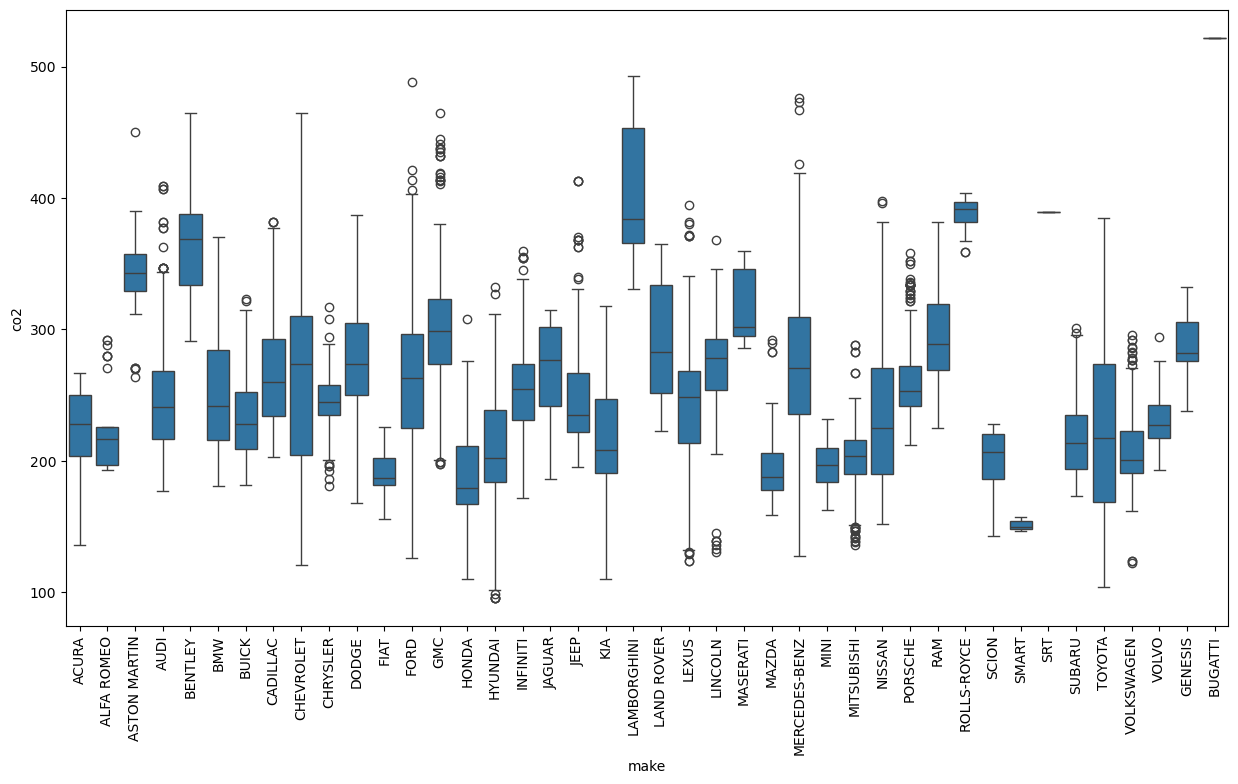

In [25]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make", y="co2", data=df)
plt.xticks(rotation = 90);
plt.show()

In [26]:
df.model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

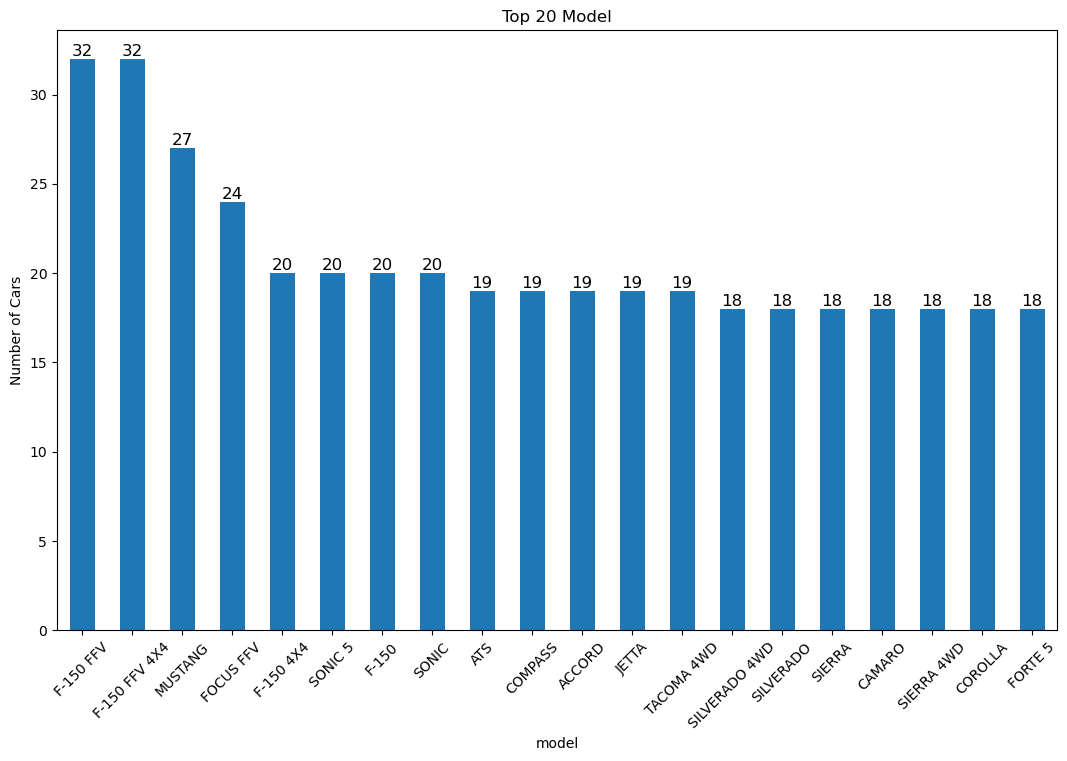

In [27]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')   
plt.xlabel('model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);
plt.show()

In [28]:
df.vehicle_class.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

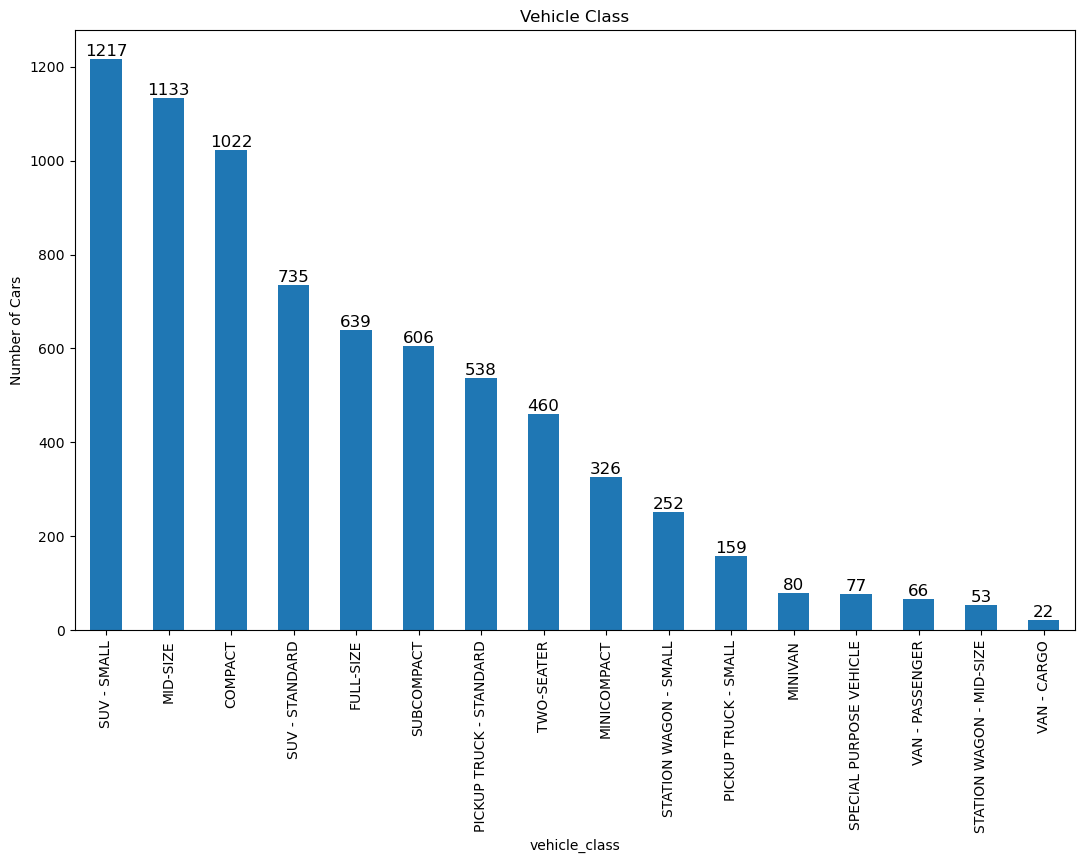

In [29]:
fig =plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.vehicle_class.value_counts().sort_values(ascending=False)
counts.plot(kind="bar")
plt.title('Vehicle Class')   
plt.xlabel('vehicle_class') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);
plt.show()

In [30]:
transmission_distr = df['vehicle_class'].value_counts().reset_index(name='count')
transmission_distr.columns = ['vehicle_class', 'count']  # Make sure this matches your DataFrame columns

fig = px.pie(transmission_distr, values='count', names='vehicle_class', title="Vehicle Class Distribution")
fig.show()

In [31]:
df.engine_size.unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

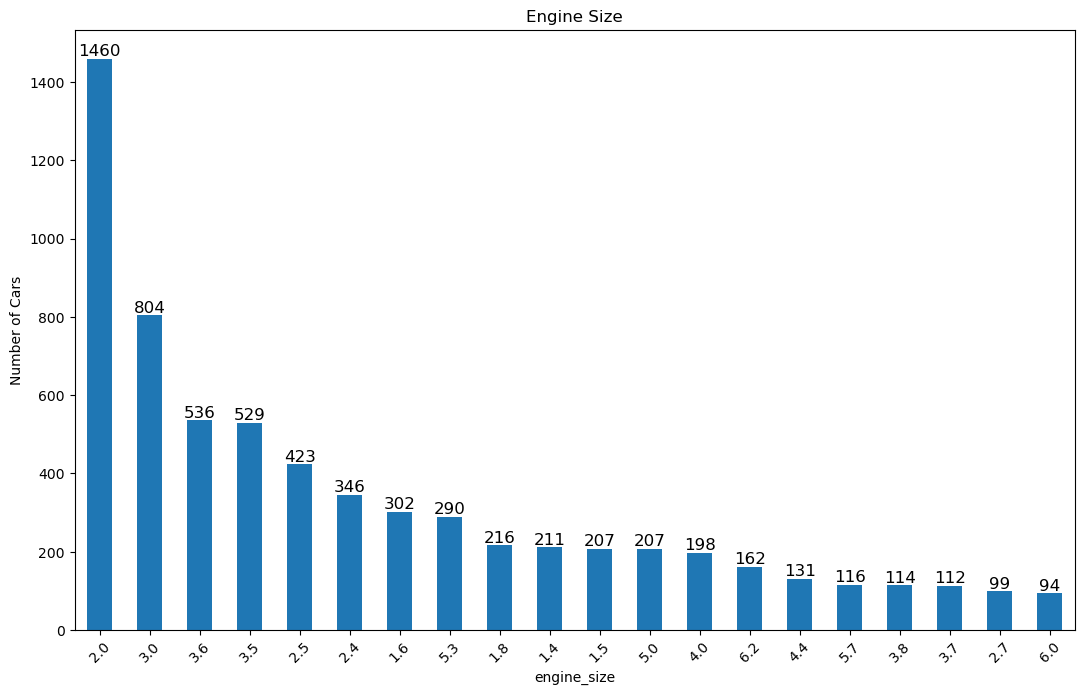

In [32]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.engine_size.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind="bar")
plt.title('Engine Size')   
plt.xlabel('engine_size') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);
plt.show()

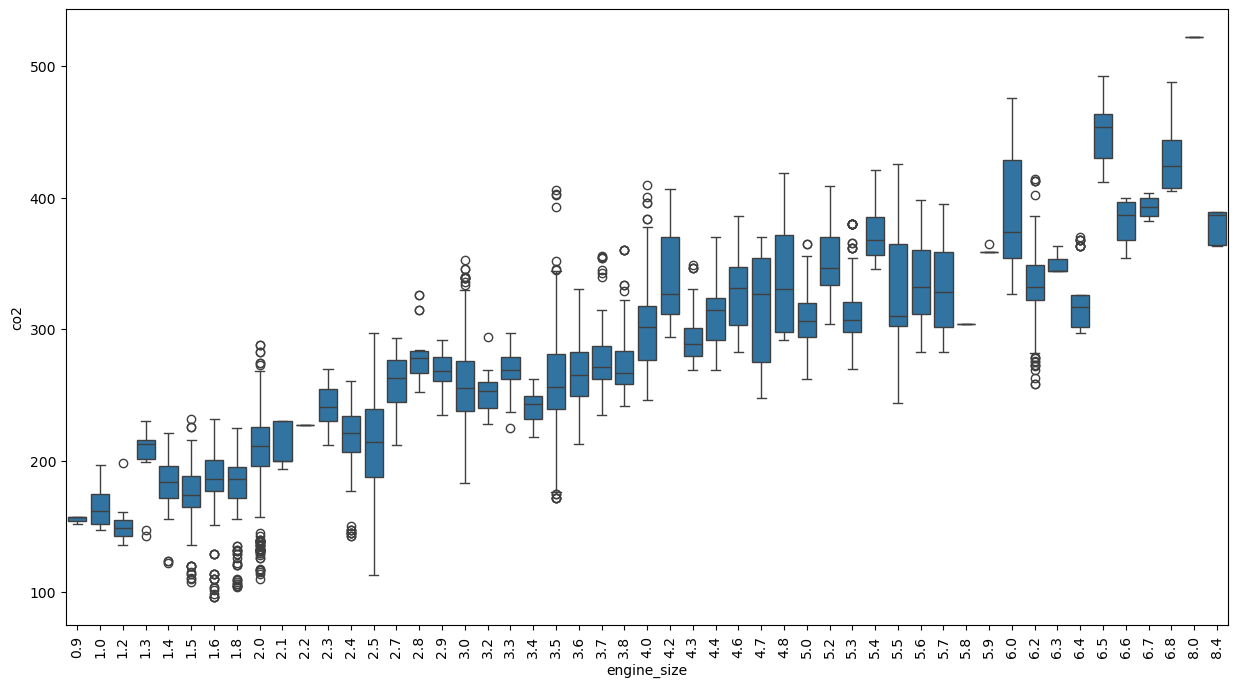

In [33]:
plt.figure(figsize = (15,8))
sns.boxplot(x="engine_size", y="co2", data=df)
plt.xticks(rotation = 90);
plt.show()

In [34]:
df.cylinders.value_counts().sort_values(ascending=False)

cylinders
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: count, dtype: int64

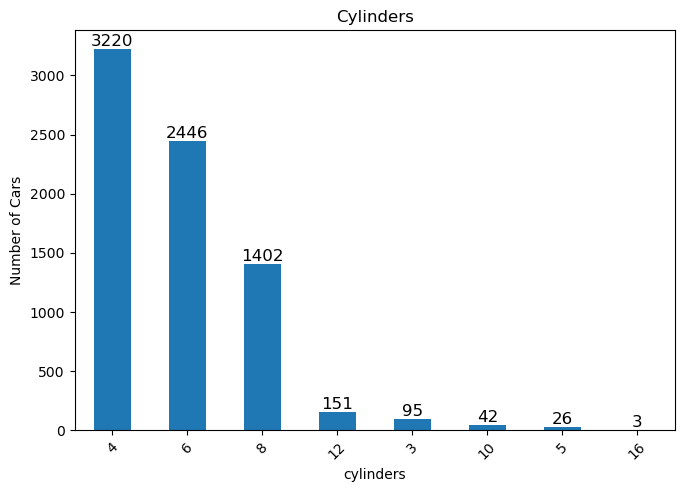

In [35]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cylinders.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind="bar")
plt.title('Cylinders')   
plt.xlabel('cylinders') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);
plt.show()

In [36]:
transmission_distr = df['cylinders'].value_counts().reset_index(name='count')
transmission_distr.columns = ['cylinders', 'count']  

fig = px.pie(transmission_distr, values='count', names='cylinders', title="Cylinders Distribution")
fig.show()

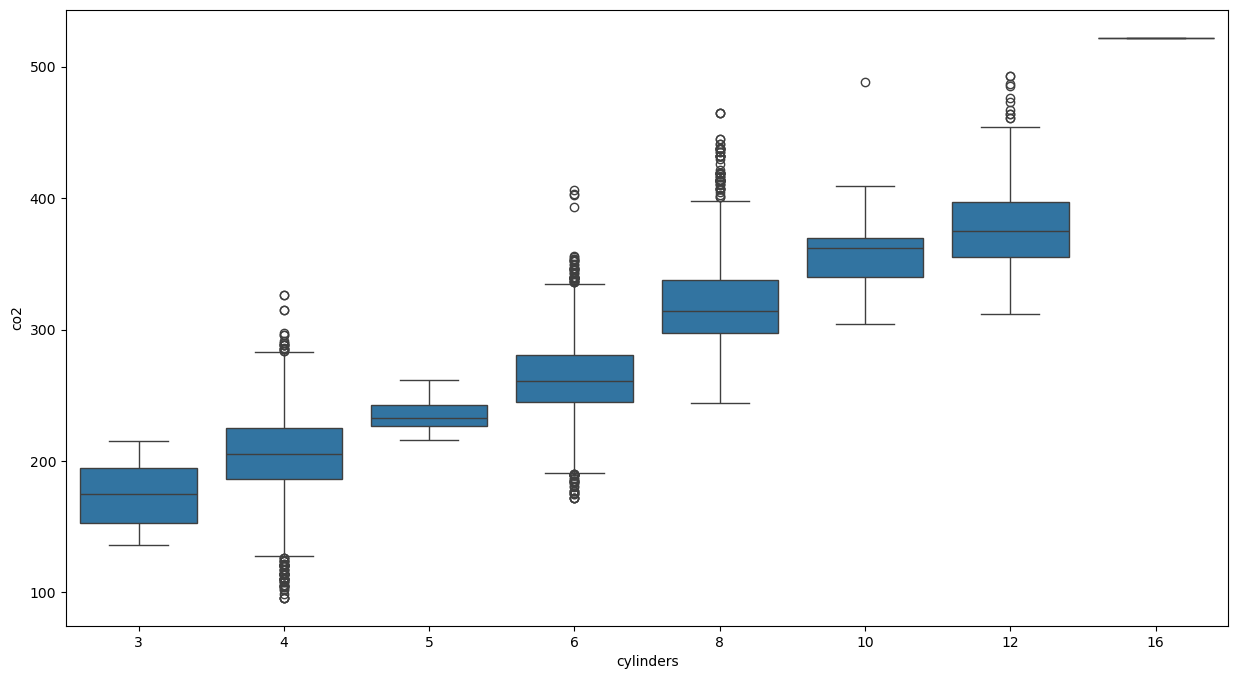

In [37]:
plt.figure(figsize = (15,8))
sns.boxplot(x="cylinders", y="co2", data=df)
plt.show()

In [38]:
df.transmission.value_counts().sort_values(ascending=False)

transmission
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

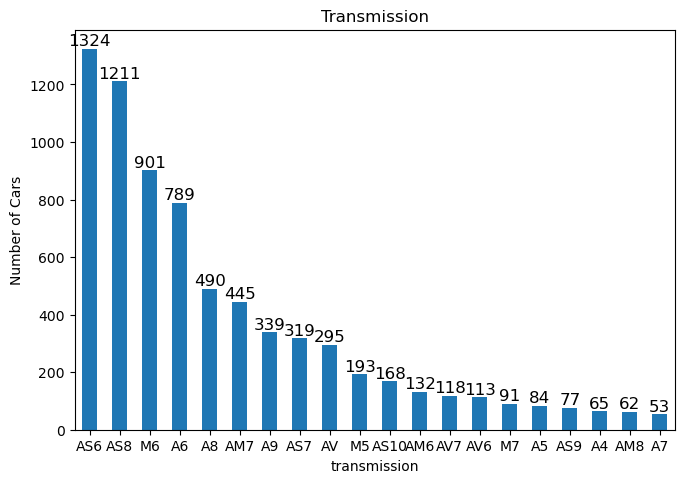

In [39]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.transmission.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Transmission')   
plt.xlabel('transmission') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12)
plt.show()

In [40]:
transmission_distr = df['transmission'].value_counts().reset_index()
transmission_distr.columns = ['transmission', 'count']  
fig = px.pie(transmission_distr, values='count', names='transmission')
fig.update_layout(title="Transmission Distribution")
fig.show()

In [41]:
df.fuel_type.value_counts()


fuel_type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [42]:
df[df["fuel_type"] == "N"]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,15.2,9.5,12.7,22,213


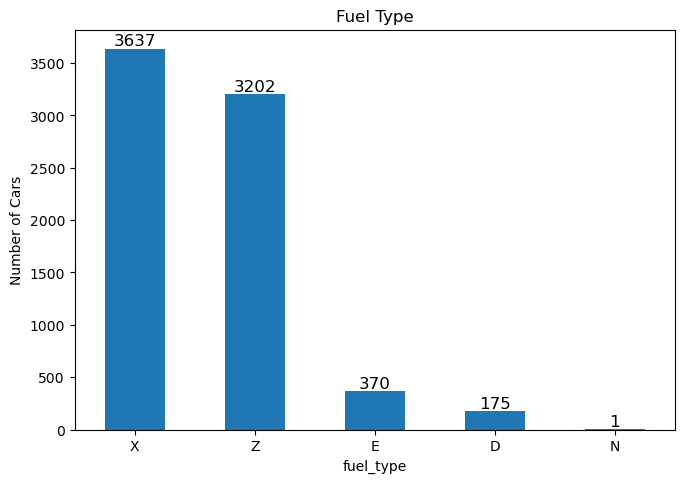

In [43]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel_type.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12)
plt.show()

In [44]:
df.fuel_cons_city.nunique()

211

In [45]:
df.fuel_cons_hwy.nunique()

143

In [46]:
df.fuel_cons_comb.nunique()

181

In [47]:
df.fuel_cons_comb_mpg.nunique()

54

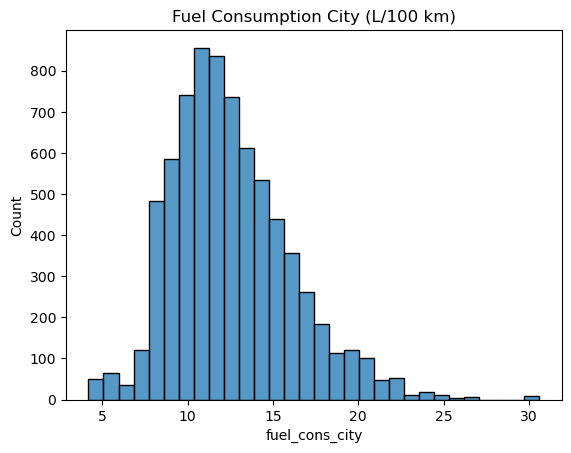

In [48]:
sns.histplot(data=df, x="fuel_cons_city", bins=30)
plt.title('Fuel Consumption City (L/100 km)')
plt.show()

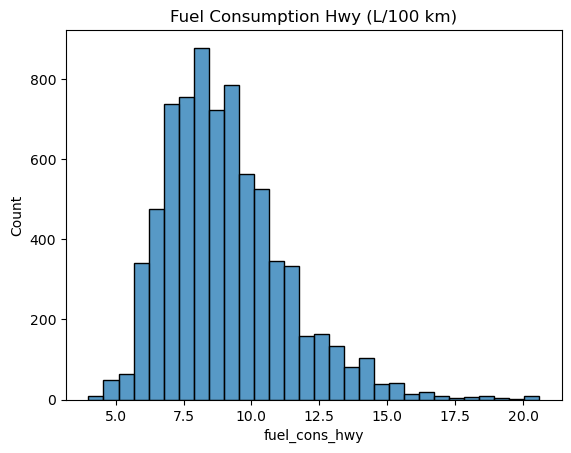

In [49]:
sns.histplot(data=df, x="fuel_cons_hwy", bins=30)
plt.title('Fuel Consumption Hwy (L/100 km)')
plt.show();

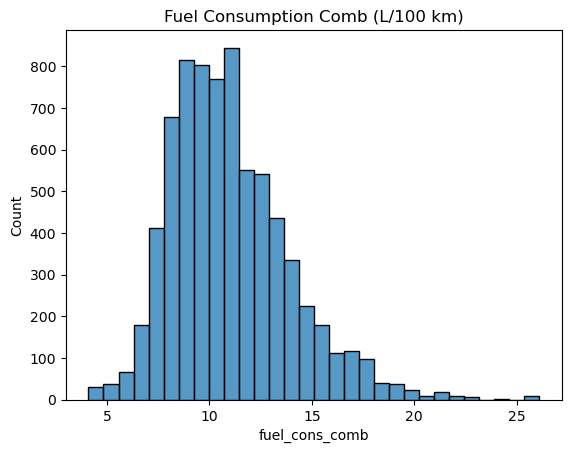

In [50]:
sns.histplot(data=df, x="fuel_cons_comb", bins=30)
plt.title('Fuel Consumption Comb (L/100 km)')
plt.show();

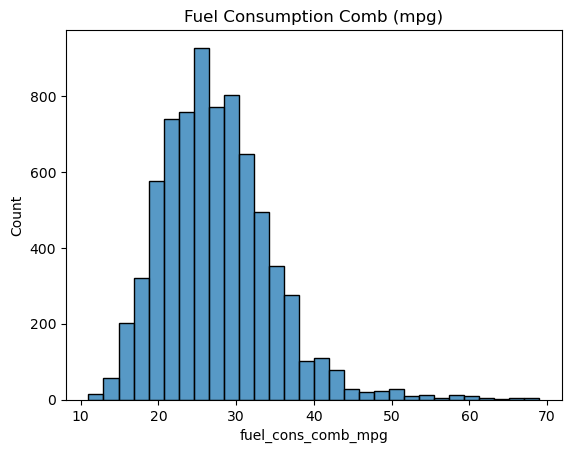

In [51]:
sns.histplot(data=df, x="fuel_cons_comb_mpg", bins=30)
plt.title('Fuel Consumption Comb (mpg)')
plt.show();

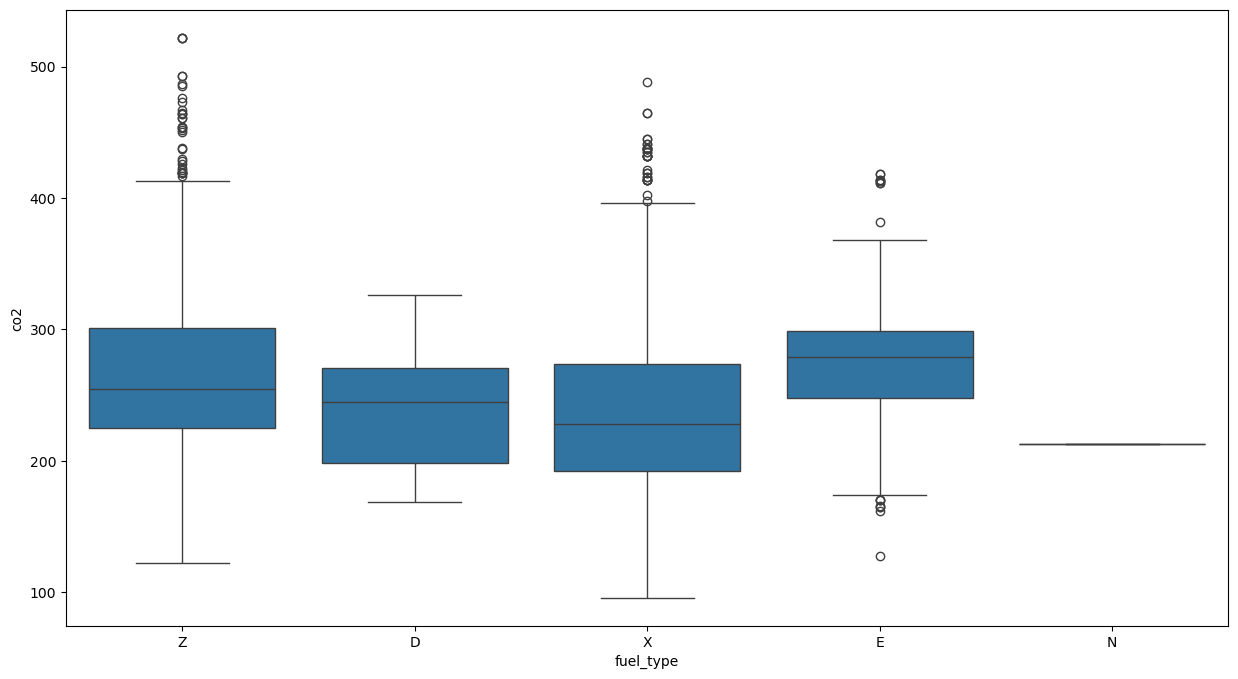

In [52]:
plt.figure(figsize = (15,8))
sns.boxplot(x="fuel_type", y="co2", data=df)
plt.show()

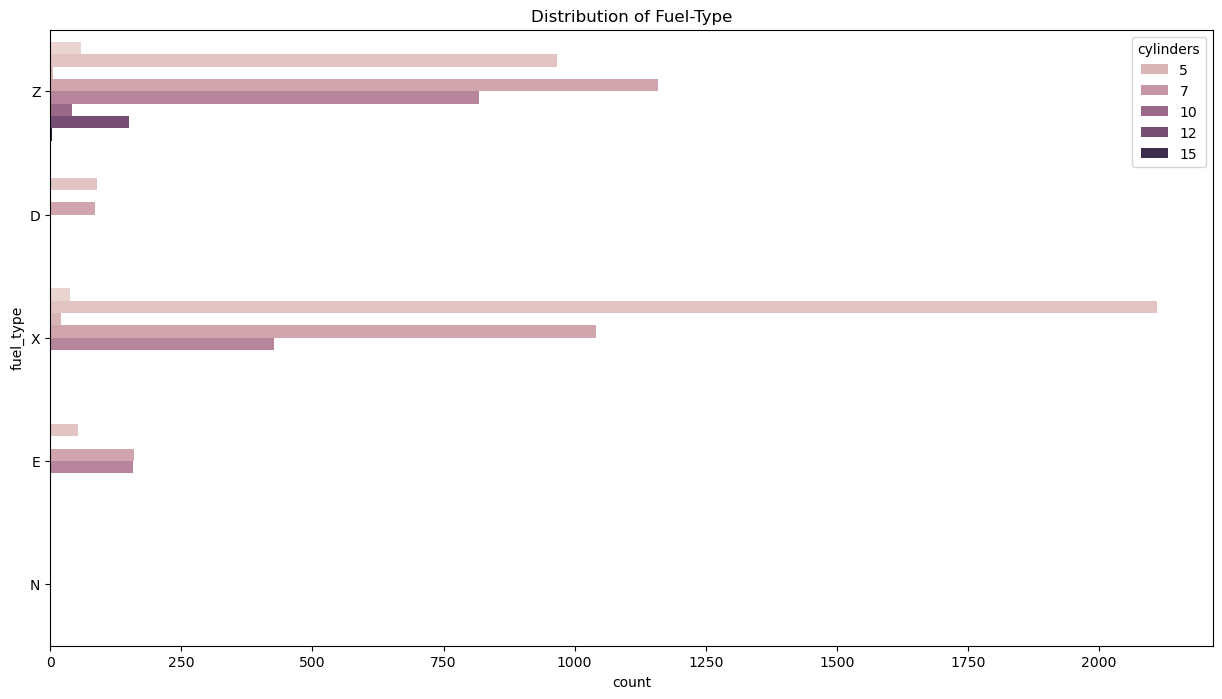

In [53]:
plt.figure(figsize = (15,8))
sns.countplot(y="fuel_type", data=df, hue='cylinders')
plt.title('Distribution of Fuel-Type')
plt.show();

In [54]:
df[df.co2 == df.co2.min()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
6950,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [55]:
df[df.co2 == df.co2.max()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


In [56]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Sadece sayısal verileri içeren bir DataFrame oluştur
numeric_df = df.select_dtypes(include=[np.number])

# Sayısal DataFrame üzerinde korelasyon hesapla ve stillendir
numeric_df.corr().style.applymap(color_correlation1)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_cons_comb_mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


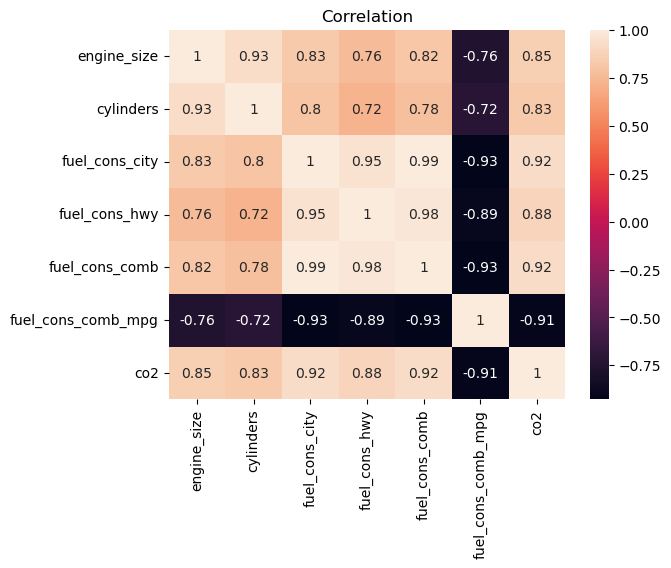

In [57]:
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation")
plt.show();

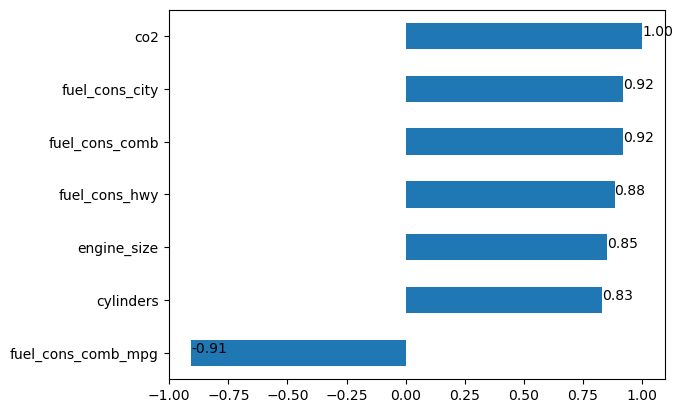

In [58]:
corr_values = numeric_df.corr()["co2"].sort_values()
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

In [59]:
sns.pairplot(df);


In [60]:
df1 = df.copy()

In [61]:
corr = df.co2.corr(df.engine_size)
corr

np.float64(0.8511446437900009)

In [62]:
r2_score = corr**2
r2_score

np.float64(0.7244472046524075)

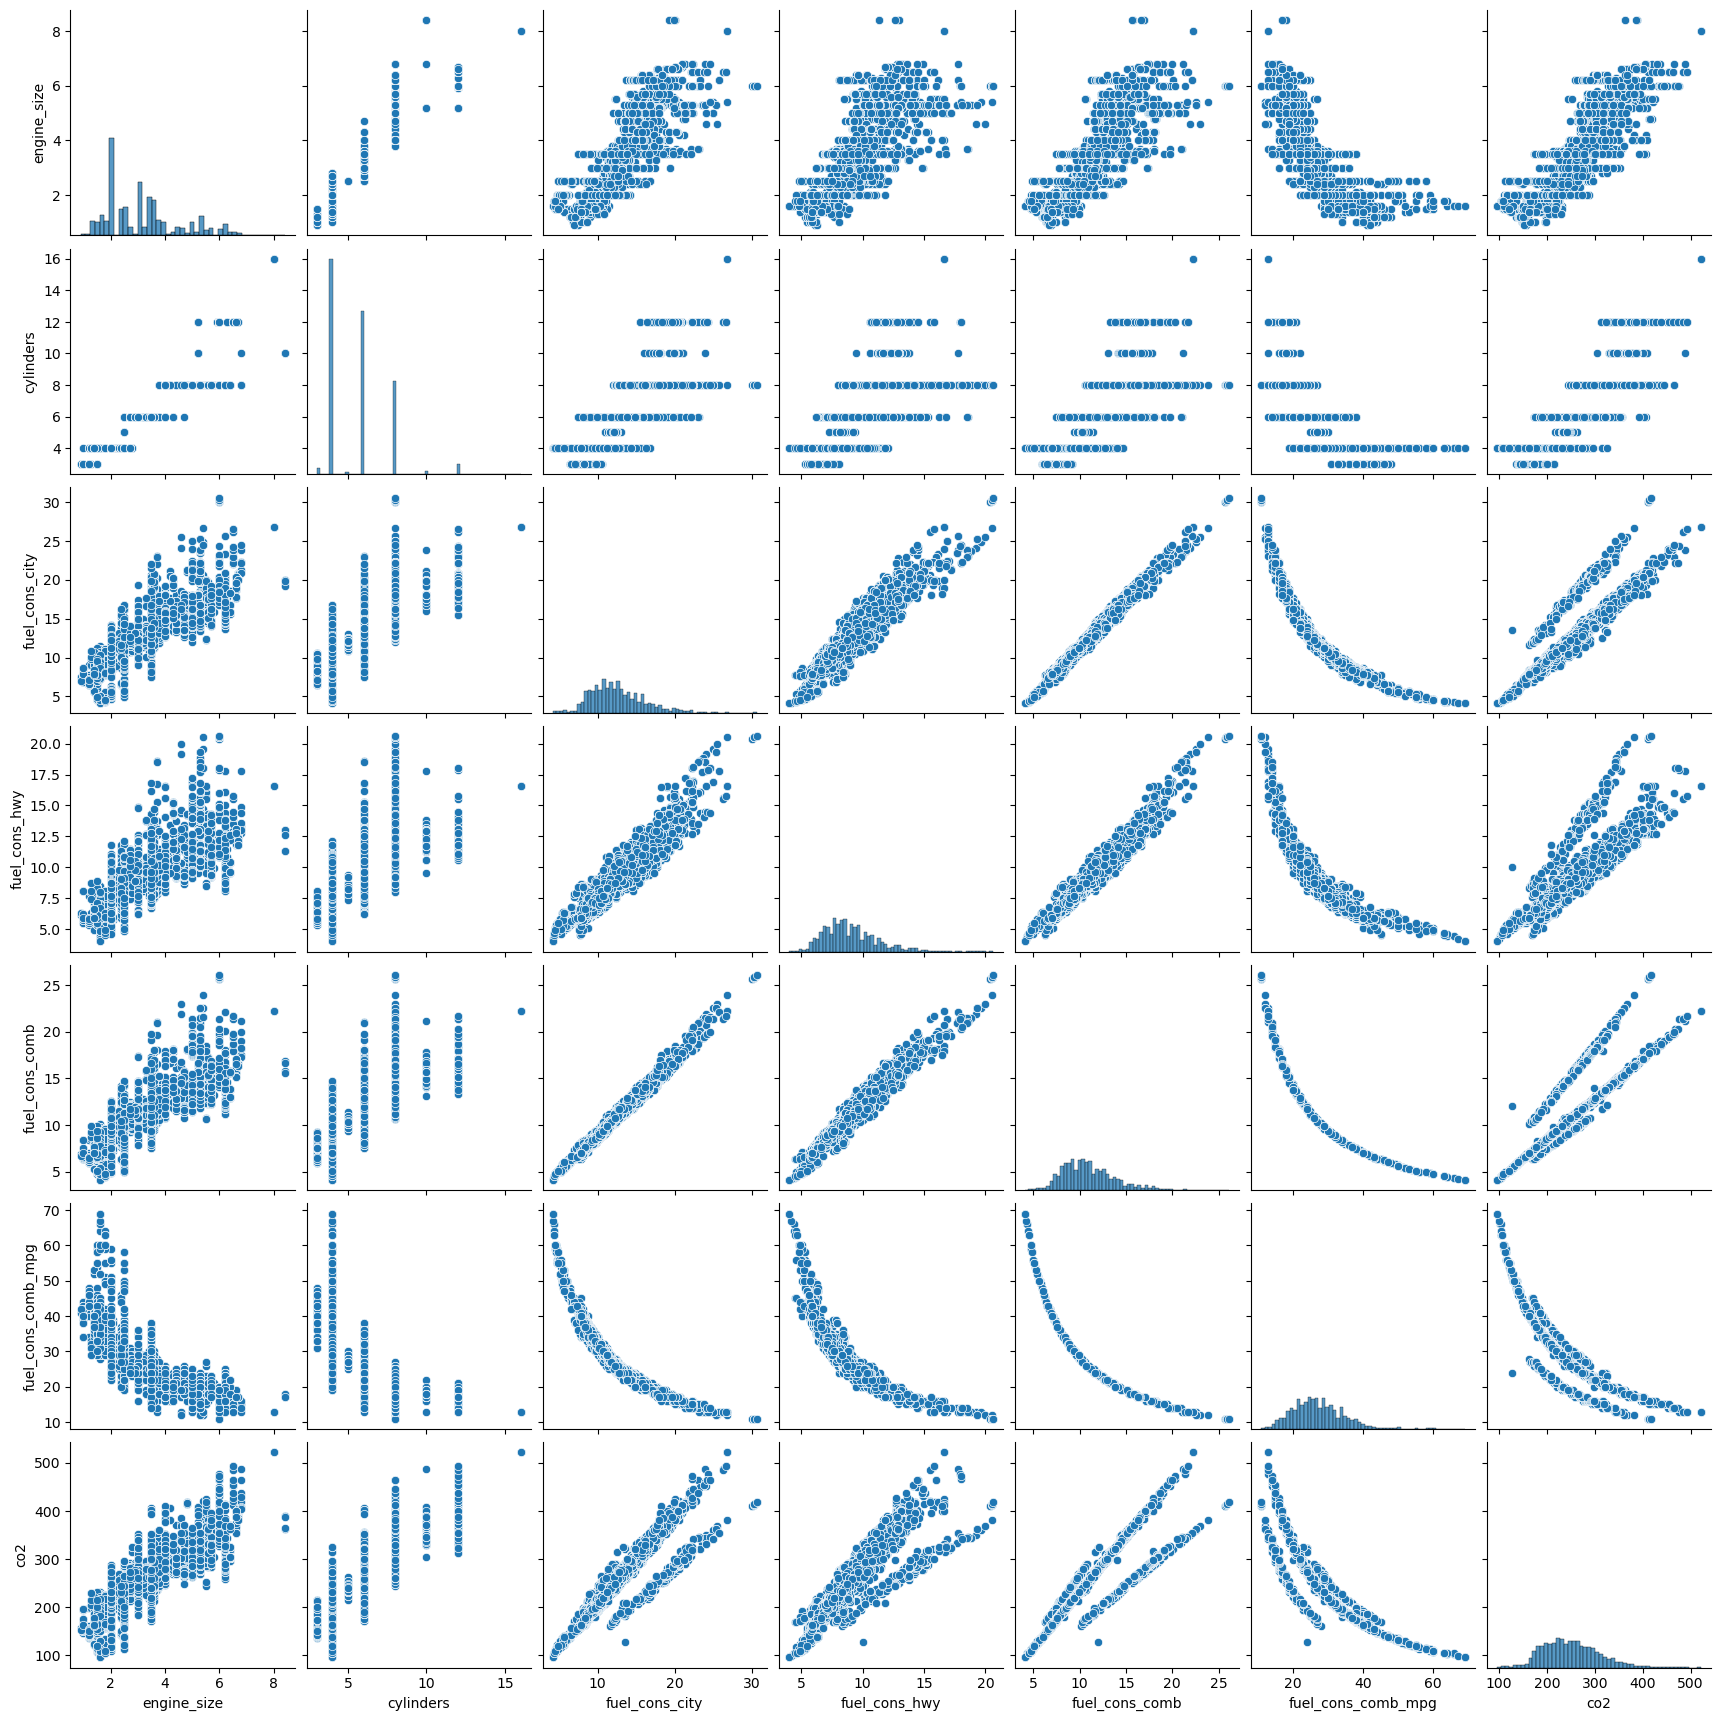

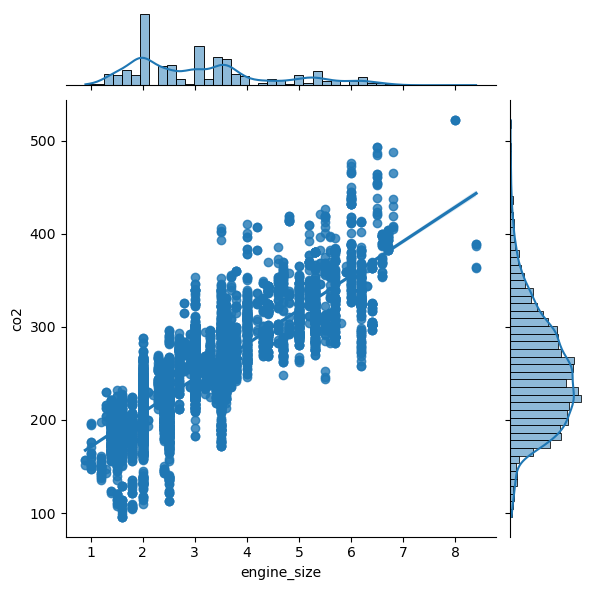

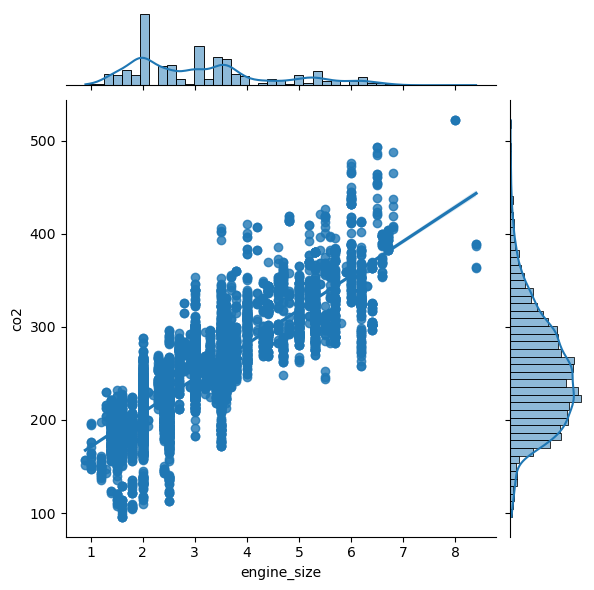

In [64]:
sns.jointplot(y=df['co2'], x=df['engine_size'],  kind='reg')
plt.show()

In [67]:
X = df[['engine_size']] # independent variable
y = df['co2'] # dependent variable

In [68]:
from sklearn.model_selection import train_test_split
 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [70]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5908, 1)
Train target shape   :  (5908,)
Test features shape  :  (1477, 1)
Test target shape    :  (1477,)


In [71]:
X_train.head()

,engine_size
1095,2.0
3538,5.3
2377,2.5
3414,4.4
880,3.4


In [72]:
from sklearn.linear_model import LinearRegression  


In [73]:
slr = LinearRegression()

In [74]:
slr.fit(X_train,y_train)

LinearRegression()

In [75]:
slr.coef_

array([36.70483532])

In [76]:
slr.intercept_

np.float64(134.57376563227757)

In [77]:
y_train_pred = slr.predict(X_train)

In [78]:
y_pred = slr.predict(X_test)

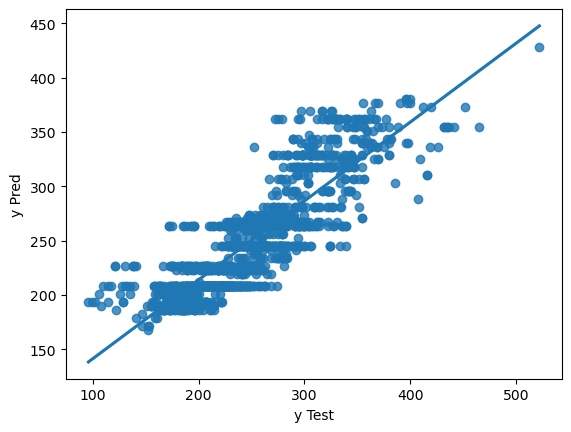

In [79]:
sns.regplot(x=y_test, y=y_pred,ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [81]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)



In [82]:
slr_score = train_val(y_train,y_train_pred,y_test,y_pred, "s_linear")
slr_score

,s_linear_train,s_linear_test
R2,0.722168,0.733527
mae,23.347037,23.025089
mse,950.918477,912.834643
rmse,30.836966,30.213153


In [83]:
avg_em = df["co2"].mean()
avg_em

np.float64(250.58469871360867)

In [84]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(30.213153476843747)

In [85]:
rmse/avg_em

np.float64(0.12057062395247894)

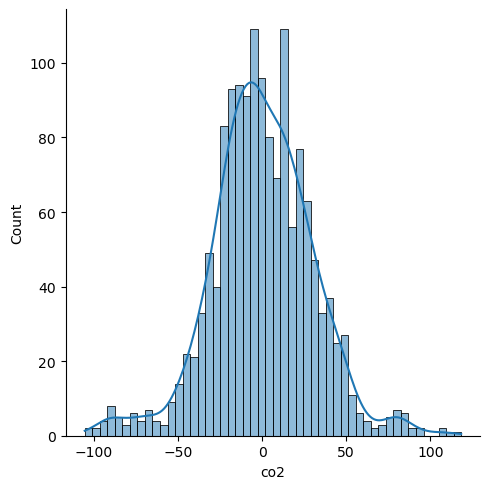

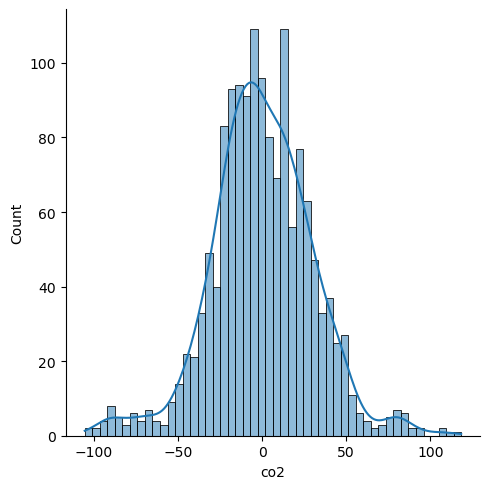

In [87]:
sns.displot((y_test-y_pred),bins=50,kde=True)

plt.show()

In [88]:
from yellowbrick.regressor import PredictionError


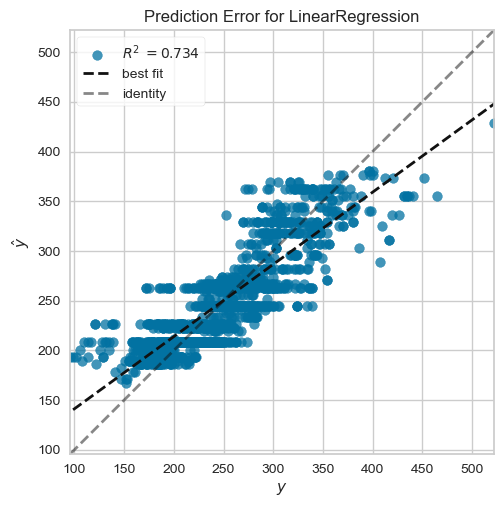

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [89]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

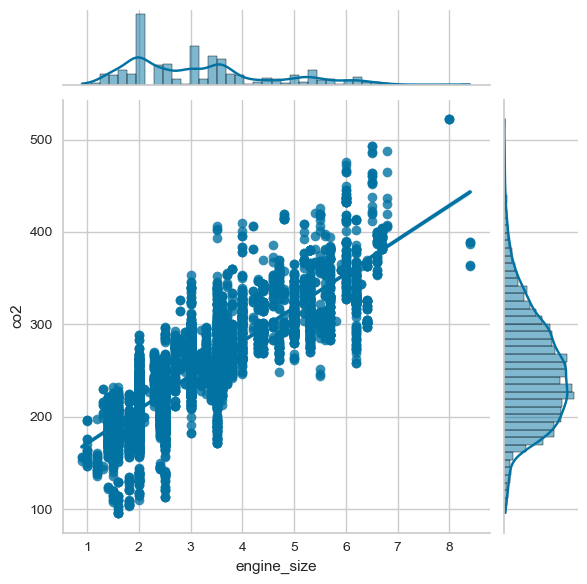

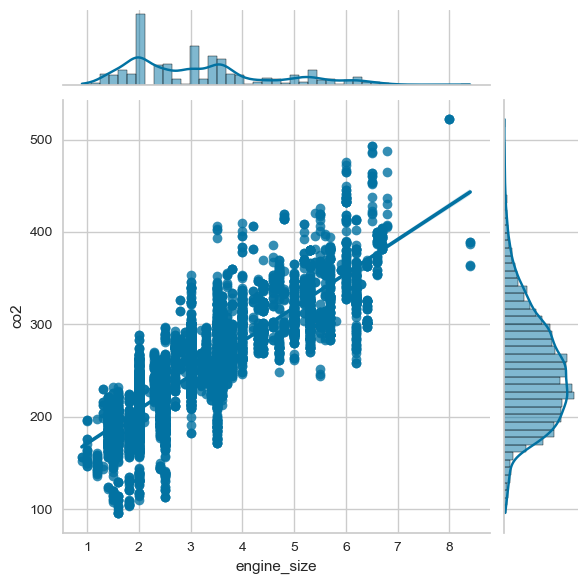

In [91]:
sns.jointplot(y=df["co2"],x=df["engine_size"], kind="reg")

plt.show()

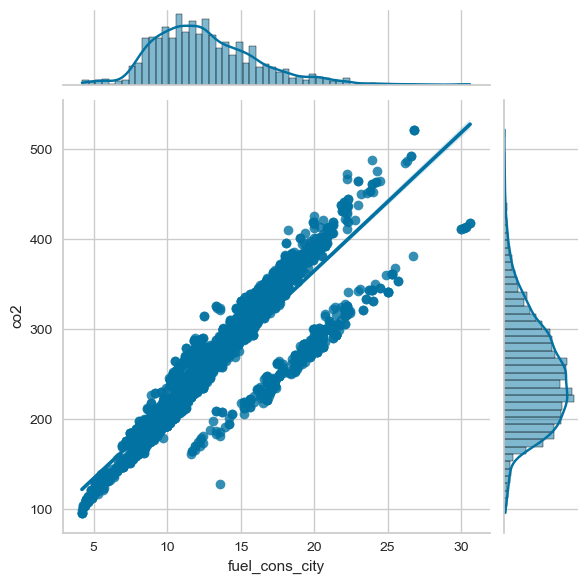

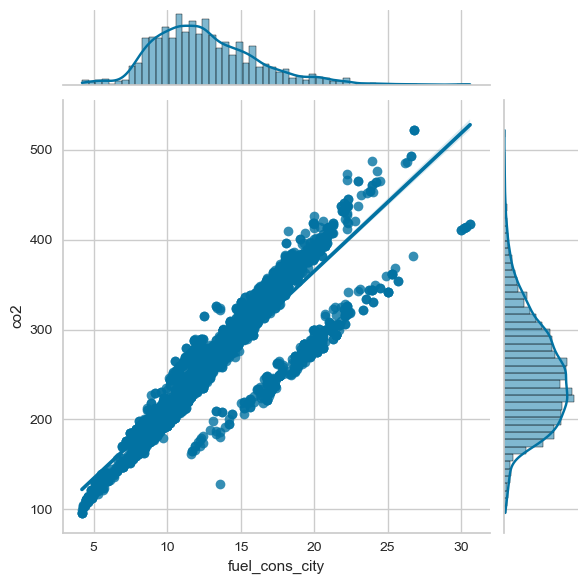

In [93]:
sns.jointplot(y=df["co2"],x=df["fuel_cons_city"], kind="reg")
plt.show();

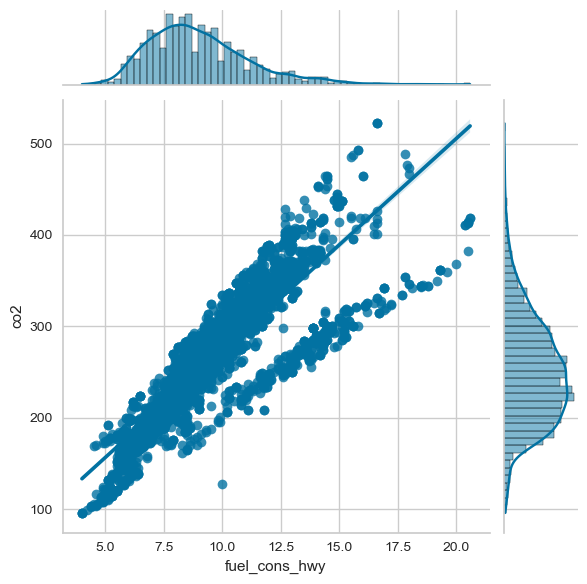

In [94]:
sns.jointplot(y=df["co2"],x=df["fuel_cons_hwy"],kind="reg")
plt.show()

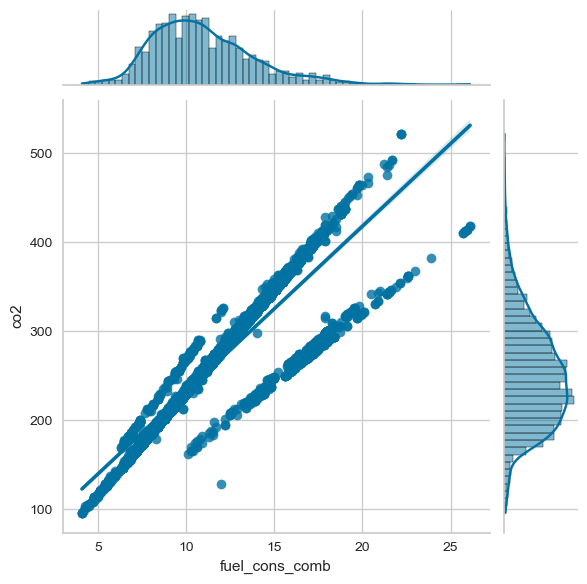

In [95]:
sns.jointplot(y=df["co2"],x=df["fuel_cons_comb"],kind="reg")

plt.show()

In [96]:
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df['co2'] 

In [97]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
numeric_df.corr().style.applymap(color_correlation2)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_cons_comb_mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [99]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5908, 4)
Train target shape   :  (5908,)
Test features shape  :  (1477, 4)
Test target shape    :  (1477,)


In [100]:
mlr = LinearRegression()

In [101]:
mlr.fit(X_train,y_train)

LinearRegression()

In [102]:
mlr.coef_

array([12.78705771,  3.70508653,  0.86566237,  8.51126305])

In [103]:
mlr.intercept_

np.float64(62.34368315543139)

In [104]:
y_train_pred = mlr.predict(X_train)

In [105]:
y_pred = mlr.predict(X_test)

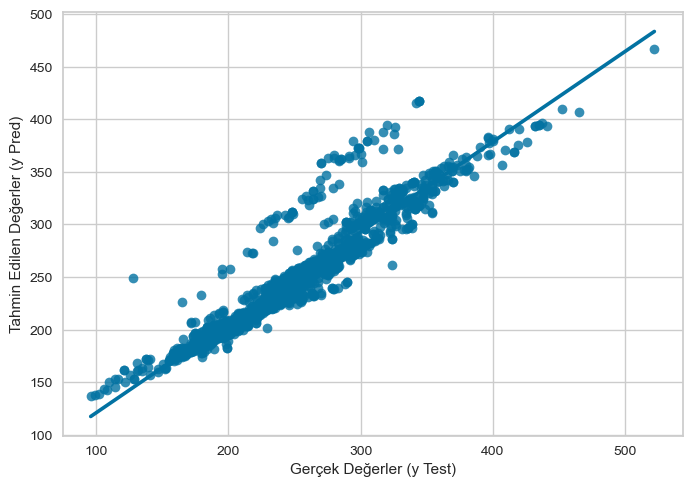

In [106]:
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Gerçek Değerler (y Test)')
plt.ylabel('Tahmin Edilen Değerler (y Pred)')
plt.show()

In [107]:
avg_em = df["co2"].mean()
avg_em

np.float64(250.58469871360867)

In [108]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(20.929893922610077)

In [109]:
rmse/avg_em

np.float64(0.0835242296519098)

In [110]:
y_pred = mlr.predict(X_test)
y_train_pred = mlr.predict(X_train)

In [111]:
train_val(y_train,y_train_pred,y_test,y_pred,"linear")

,linear_train,linear_test
R2,0.874045,0.872122
mae,13.540126,13.628374
mse,431.098224,438.060460
rmse,20.762905,20.929894


In [112]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

In [113]:
from sklearn.model_selection import cross_validate, cross_val_score


In [114]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [115]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.009061,0.011807,0.845996,0.877158,-14.705346,-13.350694,-533.607232,-419.763931,-23.099940,-20.488141
2,0.006727,0.014738,0.881622,0.873194,-12.926039,-13.556939,-402.538108,-434.302304,-20.063352,-20.839921
3,0.013998,0.008693,0.873872,0.874028,-13.991974,-13.495024,-428.489269,-431.447811,-20.699982,-20.771322
4,0.007525,0.012854,0.842741,0.877209,-14.350799,-13.309812,-500.479278,-423.542806,-22.371394,-20.580156
5,0.011271,0.007388,0.888508,0.872538,-12.506305,-13.735338,-355.408974,-439.573973,-18.852294,-20.966019
6,0.007375,0.010541,0.880078,0.873256,-13.121450,-13.619514,-411.511070,-433.297572,-20.285736,-20.815801
7,0.003660,0.007232,0.880876,0.873128,-13.904079,-13.593875,-441.719431,-430.002590,-21.017122,-20.736504
8,0.003611,0.006788,0.881415,0.873168,-13.140883,-13.615354,-397.332904,-434.896854,-19.933211,-20.854181
9,0.003385,0.007728,0.881354,0.873216,-13.325219,-13.591510,-408.574300,-433.618186,-20.213221,-20.823501
10,0.003450,0.007295,0.876151,0.873645,-13.539683,-13.526826,-441.038795,-430.023223,-21.000924,-20.737001


In [117]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                                0.873261
train_r2                               0.874054
test_neg_mean_absolute_error         -13.551178
train_neg_mean_absolute_error        -13.539489
test_neg_mean_squared_error         -432.069936
train_neg_mean_squared_error        -431.046925
test_neg_root_mean_squared_error     -20.753718
train_neg_root_mean_squared_error    -20.761255
dtype: float64

In [118]:
mlr_score = train_val(y_train,y_train_pred,y_test,y_pred,"m_linear")
mlr_score

,m_linear_train,m_linear_test
R2,0.874045,0.872122
mae,13.540126,13.628374
mse,431.098224,438.060460
rmse,20.762905,20.929894


In [121]:
pd.concat([slr_score, mlr_score], axis=1)


,s_linear_train,s_linear_test,m_linear_train,m_linear_test
R2,0.722168,0.733527,0.874045,0.872122
mae,23.347037,23.025089,13.540126,13.628374
mse,950.918477,912.834643,431.098224,438.060460
rmse,30.836966,30.213153,20.762905,20.929894


In [122]:
print("train RMSE:", 20.762905/df["co2"].mean())
print("CV RMSE:", 20.929894/df["co2"].mean())

train RMSE: 0.08285783252763476
CV RMSE: 0.08352422996074718


In [123]:
mlr.coef_

array([12.78705771,  3.70508653,  0.86566237,  8.51126305])

In [124]:
mlr_df = pd.DataFrame(mlr.coef_, index=X_train.columns, columns = ["mlr_coef"])
mlr_df

,mlr_coef
engine_size,12.787058
fuel_cons_city,3.705087
fuel_cons_hwy,0.865662
fuel_cons_comb,8.511263


In [125]:
residuals = y_test-y_pred

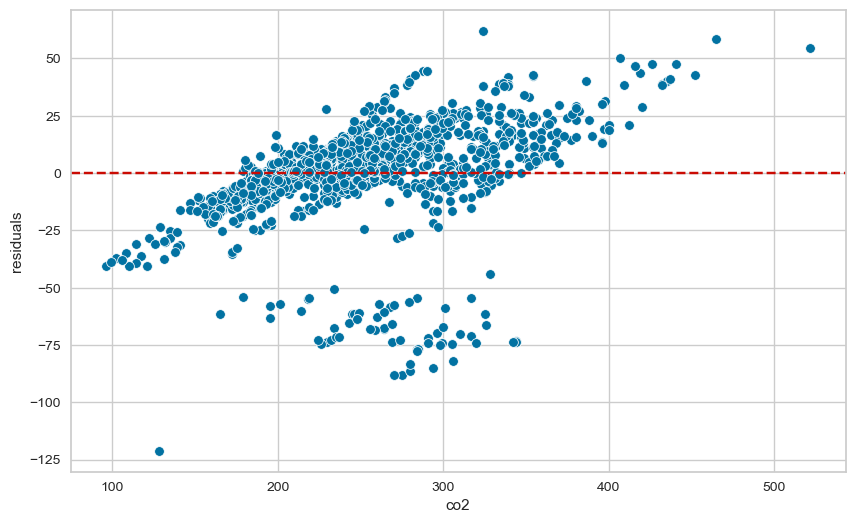

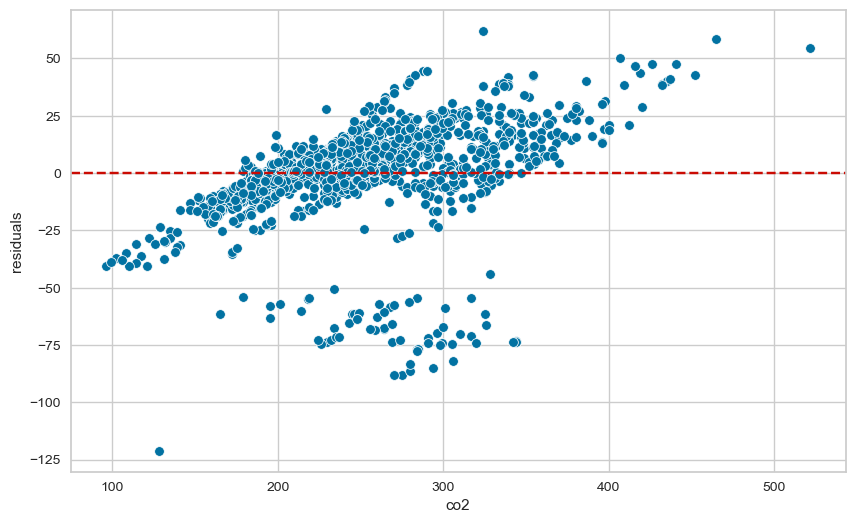

In [127]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

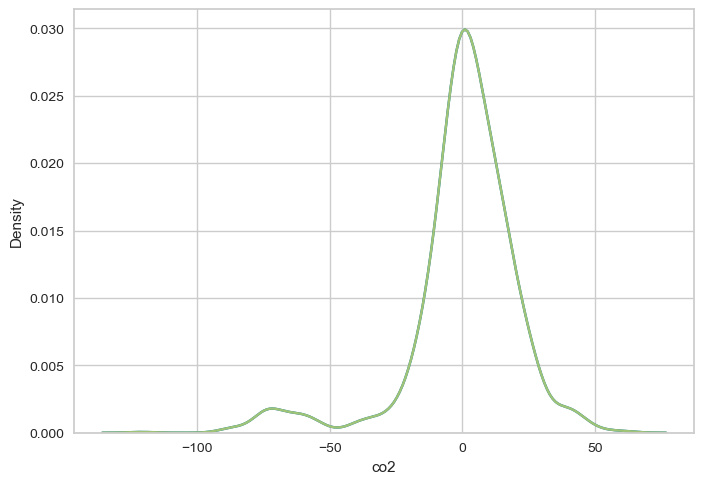

In [129]:
sns.kdeplot(residuals)
plt.show()

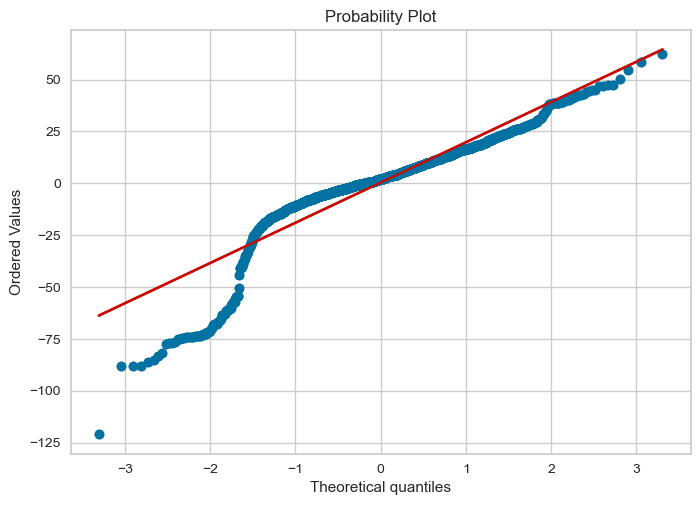

In [131]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

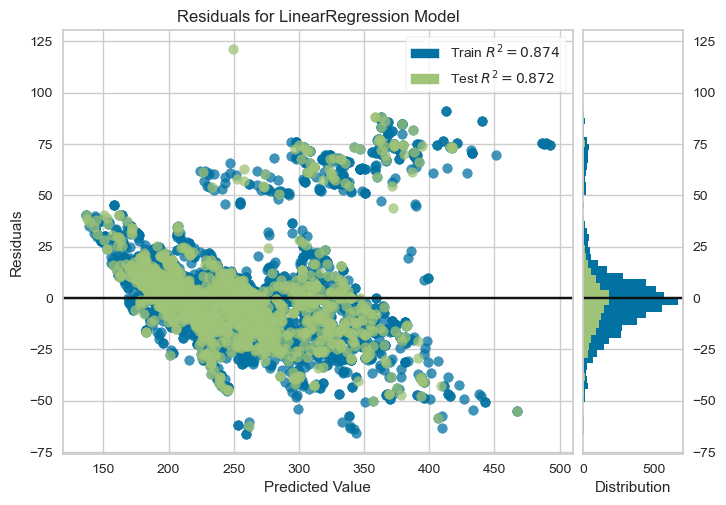

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [132]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

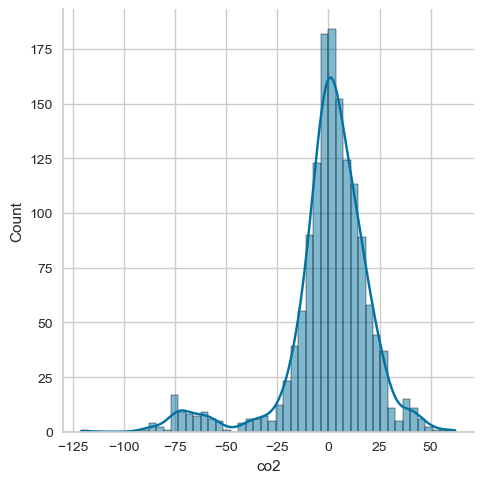

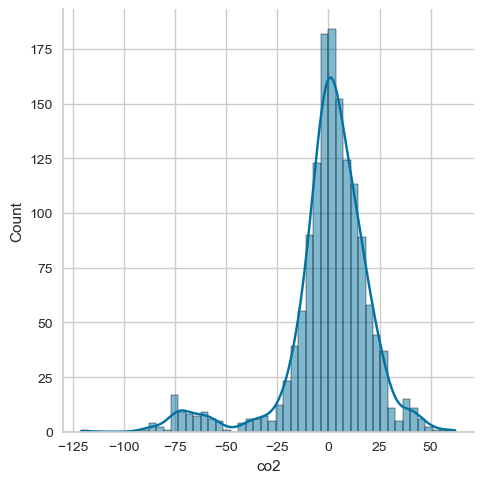

In [134]:
sns.displot((y_test-y_pred),bins=50,kde=True)
plt.show()

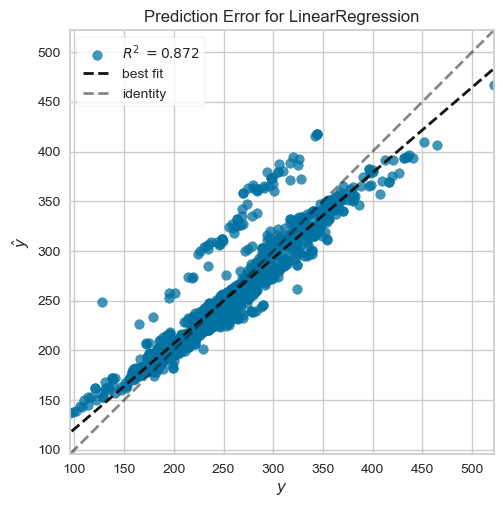

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [135]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

In [136]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [137]:
final_model.coef_

array([12.83782801,  2.97503146,  0.83187809,  9.4575278 ])

In [138]:
final_model.intercept_

np.float64(61.34157366916179)

In [139]:
X.loc[[3711,5976]]

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb
3711,5.0,15.8,9.8,13.1
5976,3.0,11.9,8.5,10.4


In [140]:
new_data = [[5.0, 15.8, 9.8, 13.1], [3.0, 11.9, 8.5, 10.4]]
new_data

[[5.0, 15.8, 9.8, 13.1], [3.0, 11.9, 8.5, 10.4]]

In [141]:
final_model.predict(new_data)

array([304.58223016, 240.68718489])

In [142]:
df.loc[[3711,5976]]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
3711,FORD,MUSTANG,SUBCOMPACT,5.0,8,M6,X,15.8,9.8,13.1,22,307
5976,JAGUAR,F-TYPE Coupe,TWO-SEATER,3.0,6,AS8,Z,11.9,8.5,10.4,27,242


In [143]:
307 - 304.58223016

2.4177698400000054

In [144]:
242 - 240.68718489

1.3128151100000025

In [145]:
y_pred_final = final_model.predict(X)
y_pred_final

array([202.43261059, 222.67044135, 159.07281134, ..., 226.39178562,
       220.87169534, 231.74550027])

In [146]:
my_dict = {"Actual": y, "pred": y_pred_final, "residual": y - y_pred_final}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
0,196,202.432611,-6.432611
1,221,222.670441,-1.670441
2,136,159.072811,-23.072811
3,255,256.605520,-1.605520
4,244,249.758986,-5.758986
5,230,242.657585,-12.657585
6,232,243.638586,-11.638586
7,255,259.387401,-4.387401
8,267,266.317123,0.682877
9,212,216.936036,-4.936036


In [147]:
def eval_metric(Actual, pred):
    mae = mean_absolute_error(Actual, pred)
    mse = mean_squared_error(Actual, pred)
    rmse = np.sqrt(mean_squared_error(Actual, pred))
    R2_score = r2_score(Actual, pred)
    #print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [148]:
print("Model testing performance: ")
eval_metric(compare.Actual, compare.pred)

Model testing performance: 
--------------------------
R2_score 	: 0.8736921162216666
MAE 		: 13.485021232564426
MSE 		: 432.38599479123945
RMSE 		: 20.793893209094815


In [149]:
avg_em = df['co2'].mean()
avg_em 

np.float64(250.58469871360867)

In [150]:
rmse = np.sqrt(mean_squared_error(y, y_pred_final))
rmse

np.float64(20.793893209094815)

In [151]:
rmse / avg_em

np.float64(0.08298149614019329)

In [152]:
engine_size = 2.0
fuel_cons_city = 8.2
fuel_cons_hwy = 6.5
fuel_cons_comb = 7.7